Minimum Cost: 3
Optimal Path: [0, 2, 5]


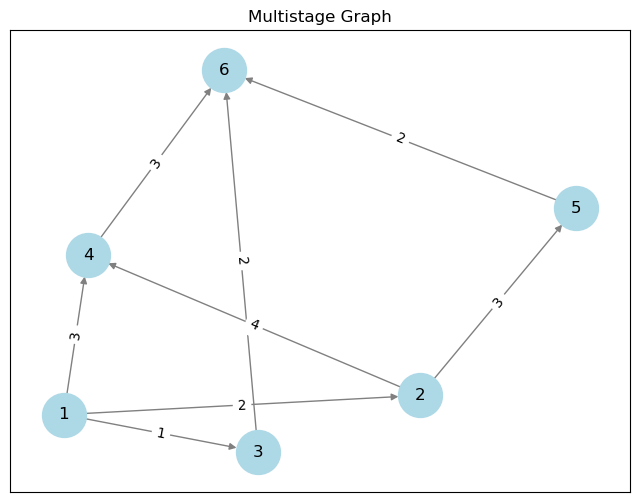

In [1]:
import sys
import networkx as nx
import matplotlib.pyplot as plt

def multistage_graph(graph, stages):
    n = len(graph)
    costs = [sys.maxsize] * n
    paths = [0] * n
    costs[n-1] = 0

    for i in range(n-2, -1, -1):
        for j in range(n):
            if graph[i][j] != 0:
                cost = graph[i][j] + costs[j]
                if cost < costs[i]:
                    costs[i] = cost
                    paths[i] = j

    stage = 0
    path = [stage]
    while stage != n-1:
        stage = paths[stage]
        path.append(stage)

    return costs[0], path

# Contoh penggunaan
graph = [
    [0, 2, 1, 3, 0, 0],
    [0, 0, 0, 4, 3, 0],
    [0, 0, 0, 0, 0, 2],
    [0, 0, 0, 0, 0, 3],
    [0, 0, 0, 0, 0, 2],
    [0, 0, 0, 0, 0, 0]
]
stages = [1, 2, 3, 4, 5, 6]

min_cost, optimal_path = multistage_graph(graph, stages)

print("Minimum Cost:", min_cost)
print("Optimal Path:", optimal_path)

# Membangun grafik multistage
G = nx.DiGraph()
for i in range(len(graph)):
    for j in range(len(graph[i])):
        if graph[i][j] != 0:
            G.add_edge(stages[i], stages[j], weight=graph[i][j])

# Menampilkan grafik multistage
pos = nx.spring_layout(G, seed=42)
edge_labels = nx.get_edge_attributes(G, 'weight')

fig, ax = plt.subplots(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=1000, font_size=12, edge_color="gray", ax=ax)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax)
plt.title("Multistage Graph")
plt.axis('on')
plt.show()
